In [ ]:
print("DL Lab")

DL Lab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1

TensorFlow

In [ ]:
#Tensorflow implementation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Generate some dummy data
X = np.random.rand(1000, 10)  # 1000 samples, 10 features each
y = np.random.randint(2, size=(1000, 1))  # Binary targets

# Define a simple Sequential model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'TensorFlow - Loss: {loss}, Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4946 - loss: 0.7166
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4876 - loss: 0.6972 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5314 - loss: 0.6921 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5219 - loss: 0.6914 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5675 - loss: 0.6839 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5333 - loss: 0.6894 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5256 - loss: 0.6898 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5590 - loss: 0.6833 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 0.6857 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 0.6833
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5569 - loss: 0.6829
TensorFlow - Loss: 0.6827589869499207, Accuracy: 0.5580000281333923


Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Generate some dummy data
X = torch.randn(1000, 10)  # 1000 samples, 10 features each
y = torch.randint(0, 2, (1000, 1), dtype=torch.float32)  # Binary targets

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Create the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to a DataLoader for batching
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Training loop
for epoch in range(10):  # 10 epochs
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_y)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluate the model (basic example using entire dataset)
with torch.no_grad():
    outputs = model(X)
    predictions = (outputs > 0.5).float()
    accuracy = (predictions == y).float().mean()
    print(f'PyTorch - Accuracy: {accuracy.item()}')


Epoch 1, Loss: 0.6851254105567932
Epoch 2, Loss: 0.6946329474449158
Epoch 3, Loss: 0.7138416171073914
Epoch 4, Loss: 0.6775593757629395
Epoch 5, Loss: 0.7061393857002258
Epoch 6, Loss: 0.7237228155136108
Epoch 7, Loss: 0.5972021222114563
Epoch 8, Loss: 0.6808435916900635
Epoch 9, Loss: 0.605871856212616
Epoch 10, Loss: 0.7470676898956299
PyTorch - Accuracy: 0.5979999899864197


# 2

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Preprocess the data
# Normalize the pixel values (0 to 255) to (0 to 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = to_categorical(y_test, 10)

# 3. Define the feedforward neural network (FFNN)
model = Sequential()

# Flatten the 28x28 images into a single 784-dimensional vector
model.add(Flatten(input_shape=(28, 28)))

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add another fully connected layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer with 10 neurons (for each digit 0-9) and softmax activation
model.add(Dense(10, activation='softmax'))

# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 6. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8587 - loss: 0.4865 - val_accuracy: 0.9580 - val_loss: 0.1369
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9640 - loss: 0.1189 - val_accuracy: 0.9639 - val_loss: 0.1165
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9759 - loss: 0.0759 - val_accuracy: 0.9707 - val_loss: 0.0933
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0569 - val_accuracy: 0.9750 - val_loss: 0.0866
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9865 - loss: 0.0414 - val_accuracy: 0.9735 - val_loss: 0.0938
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9884 - loss: 0.0355 - val_accuracy: 0.9737 - val_loss: 0.0941
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9903 - loss: 0.0286 - val_accuracy: 0.9743 - val_loss: 0.0987
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9932 - loss: 0.0225 - 

# 3

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. Preprocess the data
# Normalize the images from range [0, 255] to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # 10 classes in CIFAR-10
y_test = to_categorical(y_test, 10)

# 3. Define the feedforward neural network
model = Sequential()

# Flatten the 32x32x3 images into a 1D vector of 3072 (32*32*3)
model.add(Flatten(input_shape=(32, 32, 3)))

# Add a fully connected layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Add another fully connected layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# Add another fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 6. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2498 - loss: 2.0558 - val_accuracy: 0.3771 - val_loss: 1.7541
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3805 - loss: 1.7154 - val_accuracy: 0.4048 - val_loss: 1.6825
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4170 - loss: 1.6353 - val_accuracy: 0.4211 - val_loss: 1.6166
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4363 - loss: 1.5640 - val_accuracy: 0.4228 - val_loss: 1.6281
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4590 - loss: 1.5186 - val_accuracy: 0.4361 - val_loss: 1.5725
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4712 - loss: 1.4801 - val_accuracy: 0.4491 - val_loss: 1.5625
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4811 - loss: 1.4513 - val_accuracy: 0.4597 - val_loss: 1.5482
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

# 4

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 2. Preprocess the data
# Reshape data to include a single channel (grayscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values from [0, 255] to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Define the CNN model
model = Sequential()

# Add a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape of 28x28x1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling2D layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 10 neurons (for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 6. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6740 - loss: 0.9007 - val_accuracy: 0.8479 - val_loss: 0.4102
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8314 - loss: 0.4634 - val_accuracy: 0.8698 - val_loss: 0.3497
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8598 - loss: 0.3888 - val_accuracy: 0.8836 - val_loss: 0.3159
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.8743 - loss: 0.3472 - val_accuracy: 0.8917 - val_loss: 0.2887
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8821 - loss: 0.3257 - val_accuracy: 0.8942 - val_loss: 0.2806
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8881 - loss: 0.3074 - val_accuracy: 0.9028 - val_loss: 0.2574
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8950 - loss: 0.2859 - val_accuracy: 0.9047 - val_loss: 0.2602
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8983 - loss: 0.2752 - 

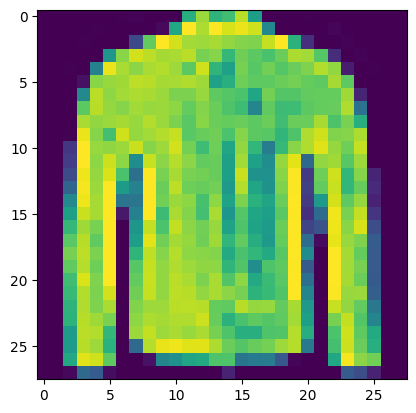

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


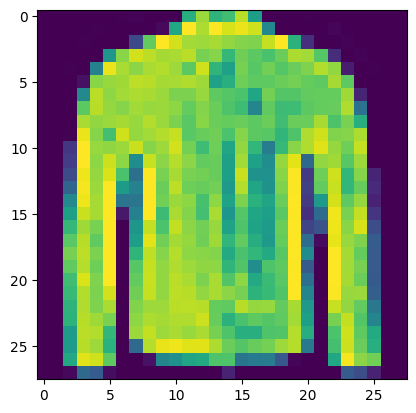

Prediction: 4


In [11]:
import matplotlib.pyplot as plt

n=50
plt.imshow(X_test[n])
plt.show()
predicted_value = model.predict(X_test)
plt.imshow(X_test[n])
plt.show()
print('Prediction:',predicted_value[n].argmax())

# 5

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Define the directory paths for training and testing data
train_dir = '/content/drive/MyDrive/BE STUDY/DL/Dataset/chest_xray/train'
test_dir = '/content/drive/MyDrive/BE STUDY/DL/Dataset/chest_xray/test'

# 2. Preprocess the data using ImageDataGenerator
# Apply image augmentation to avoid overfitting and to improve generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values (scale images to [0,1])
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Translate images horizontally by up to 20%
    height_shift_range=0.2,  # Translate images vertically by up to 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformation
)

# Test data doesn't require augmentation, but we normalize the pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# 3. Create the data generators for loading images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'  # Binary classification (Normal vs Pneumonia)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'
)

# 4. Build the CNN model
model = Sequential()

# First Conv2D layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv2D layer with 64 filters and 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv2D layer with 128 filters and 3x3 kernel
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Conv2D layer with 128 filters and 3x3 kernel
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the Conv2D layers
model.add(Flatten())

# Fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add dropout for regularization to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# 5. Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Train for 10 epochs (adjust as needed)
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# 7. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 532s 15s/step - accuracy: 0.5465 - loss: 0.6893 - val_accuracy: 0.4896 - val_loss: 0.6867
Epoch 2/10
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5000 - loss: 0.6882

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.5000 - loss: 0.6882 - val_accuracy: 0.7500 - val_loss: 0.6592
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 329ms/step - accuracy: 0.5392 - loss: 0.6815 - val_accuracy: 0.5677 - val_loss: 0.6711
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6875 - loss: 0.6142 - val_accuracy: 0.6250 - val_loss: 0.6350
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.6110 - loss: 0.6532 - val_accuracy: 0.5104 - val_loss: 0.6738
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5938 - loss: 0.6665 - val_accuracy: 0.6250 - val_loss: 0.6143
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.7077 - loss: 0.5959 - val_accuracy: 0.5625 - val_loss: 0.6153
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.7500 - loss: 0.5923 - val_accuracy: 0.6250 - val_loss: 0.5327
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - accuracy: 0.7207 - loss: 0.5602 - val_accuracy: 0.5729 - va

# 6

Dataset download

actual code

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Define the directory paths for training and testing data
train_dir = '/content/drive/MyDrive/BE STUDY/DL/Dataset/food_dataset/training'
test_dir = '/content/drive/MyDrive/BE STUDY/DL/Dataset/food_dataset/evaluation'

# 2. Preprocess the data using ImageDataGenerator
# Apply image augmentation to avoid overfitting and to improve generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values (scale images to [0,1])
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Translate images horizontally by up to 20%
    height_shift_range=0.2,  # Translate images vertically by up to 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels after transformation
)

# Test data doesn't require augmentation, but we normalize the pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# 3. Create the data generators for loading images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='categorical'  # Multiclass classification for food categories
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='categorical'
)

# 4. Build the CNN model
model = Sequential()

# First Conv2D layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv2D layer with 64 filters and 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv2D layer with 128 filters and 3x3 kernel
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Conv2D layer with 128 filters and 3x3 kernel
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the Conv2D layers
model.add(Flatten())

# Fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add dropout for regularization to prevent overfitting
model.add(Dropout(0.5))

# Output layer with units equal to the number of food categories and softmax activation
model.add(Dense(train_generator.num_classes, activation='softmax'))

# 5. Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Train for 10 epochs (adjust as needed)
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# 7. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 404 images belonging to 4 classes.
Found 164 images belonging to 4 classes.
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 259s 13s/step - accuracy: 0.2714 - loss: 1.3977 - val_accuracy: 0.2750 - val_loss: 1.3820
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.1875 - loss: 1.4080 - val_accuracy: 0.5000 - val_loss: 1.3512
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 378ms/step - accuracy: 0.2919 - loss: 1.3805 - val_accuracy: 0.2688 - val_loss: 1.3683
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.2000 - loss: 1.3918 - val_accuracy: 0.0000e+00 - val_loss: 1.4053
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.3378 - loss: 1.3600 - val_accuracy: 0.4000 - val_loss: 1.3478
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.3552 - val_accuracy: 0.7500 - val_loss: 1.3058
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.3764 - loss: 1.3343 - val_accuracy: 0.3875 - val_loss: 1.3097
Epoch 8/10
12/12 ━━━

# RNN

In [ ]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Loss function (Mean Squared Error)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# RNN Class using NumPy
class RNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate

        # Input to hidden layer weights
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01
        # Hidden to hidden (recurrent) weights
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        # Hidden to output layer weights
        self.Why = np.random.randn(output_size, hidden_size) * 0.01

        # Biases for the hidden and output layers
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))

    def forward(self, inputs):
        h_prev = np.zeros((self.hidden_size, 1))  # Initialize hidden state
        self.hs = {}  # Store all hidden states
        self.hs[-1] = h_prev  # Set the initial hidden state

        outputs = []  # Store all outputs

        for t, x in enumerate(inputs):
            # Reshape input x into a column vector
            x = x.reshape(-1, 1)

            # Compute the hidden state
            h_current = sigmoid(np.dot(self.Wxh, x) + np.dot(self.Whh, h_prev) + self.bh)
            # Compute the output
            y = np.dot(self.Why, h_current) + self.by

            # Store the hidden state and output
            self.hs[t] = h_current
            outputs.append(y)

            # Update hidden state
            h_prev = h_current

        return np.array(outputs)

    def backward(self, inputs, targets):
        # Initialize gradients for weight and bias matrices
        dWxh, dWhh, dWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
        dh_next = np.zeros((self.hidden_size, 1))

        loss = 0

        # Iterate over the inputs in reverse order for backpropagation through time
        for t in reversed(range(len(inputs))):
            # Reshape the input and target
            x = inputs[t].reshape(-1, 1)
            y_true = targets[t].reshape(-1, 1)

            # Calculate loss
            y_pred = np.dot(self.Why, self.hs[t]) + self.by
            loss += mse_loss(y_true, y_pred)

            # Gradient of the output layer (dL/dy_pred)
            dy = y_pred - y_true

            # Gradients for Why and by
            dWhy += np.dot(dy, self.hs[t].T)
            dby += dy

            # Backpropagate into hidden layer
            dh = np.dot(self.Why.T, dy) + dh_next
            dh_raw = dh * sigmoid_derivative(self.hs[t])

            # Gradients for Wxh, Whh, and bh
            dWxh += np.dot(dh_raw, x.T)
            dWhh += np.dot(dh_raw, self.hs[t-1].T)
            dbh += dh_raw

            # Update next dh for backpropagation
            dh_next = np.dot(self.Whh.T, dh_raw)

        # Clip gradients to avoid exploding gradients
        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -1, 1, out=dparam)

        # Update weights and biases using gradient descent
        self.Wxh -= self.learning_rate * dWxh
        self.Whh -= self.learning_rate * dWhh
        self.Why -= self.learning_rate * dWhy
        self.bh -= self.learning_rate * dbh
        self.by -= self.learning_rate * dby

        return loss

    def train(self, inputs, targets, epochs=100):
        for epoch in range(epochs):
            # Forward pass
            outputs = self.forward(inputs)

            # Backward pass
            loss = self.backward(inputs, targets)

            # Print the loss every 10 epochs
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

# Sample sequence prediction task
# Input: [0, 1, 2, 3, 4]
# Target: [1, 2, 3, 4, 5] (predict the next number in the sequence)

inputs = np.array([[0], [1], [2], [3], [4]])
targets = np.array([[1], [2], [3], [4], [5]])

# Initialize the RNN with input_size=1, hidden_size=10, output_size=1
rnn = RNN(input_size=1, hidden_size=10, output_size=1)

# Train the RNN on the sequence for 100 epochs
rnn.train(inputs, targets, epochs=100)

# Test the trained model on a new sequence
test_inputs = np.array([[5], [6], [7], [8], [9]])
predictions = rnn.forward(test_inputs)

# Print predictions
print("Predictions: ")
print(predictions.flatten())


# AutoEncoder

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6909 - val_loss: 0.6155
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5988 - val_loss: 0.5535
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.5400 - val_loss: 0.5038
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.4925 - val_loss: 0.4638
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.4548 - val_loss: 0.4314
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.4239 - val_loss: 0.4050
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3988 - val_loss: 0.3834
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3786 - val_loss: 0.3656
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3612 - val_loss: 0.3508
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3471 - val_loss: 0.3385
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3353 - val_los

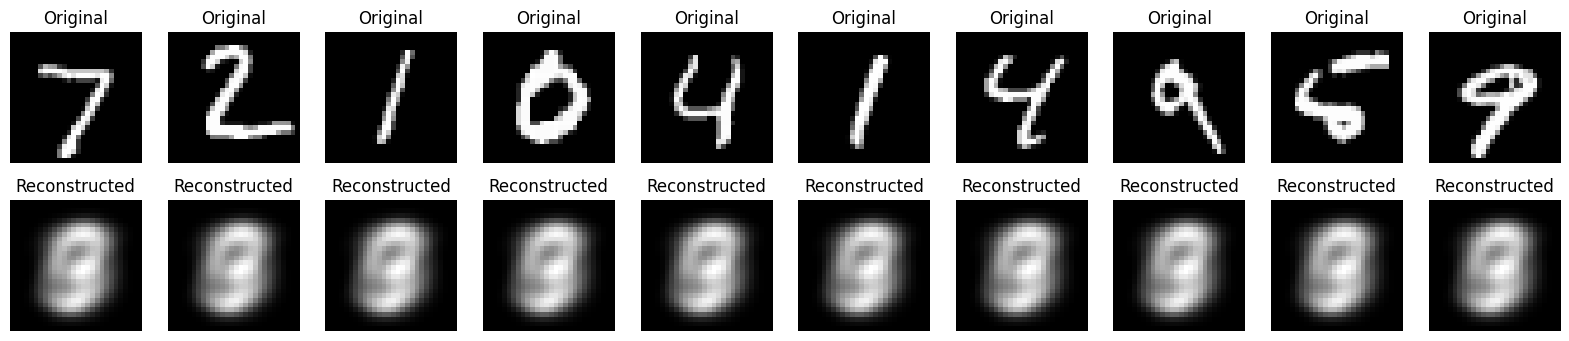

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], -1))  # Flatten 28x28 images into 784-dim vectors
x_test = x_test.reshape((x_test.shape[0], -1))

# 2. Build the autoencoder architecture
input_dim = x_train.shape[1]  # 784 (28x28)
encoding_dim = 64  # Number of neurons in the encoding layer

# Input layer
input_img = Input(shape=(input_dim,))

# Encoding layer with sparsity constraint (activity_regularizer)
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)

# Decoding layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# 3. Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 5. Evaluate the reconstruction performance
reconstructed_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


In [13]:
from sklearn.metrics import mean_squared_error

# After reconstructing the test images
reconstructed_imgs = autoencoder.predict(x_test)

# Compute Mean Squared Error (MSE) for each image
mse_values = np.mean(np.square(x_test - reconstructed_imgs), axis=1)

# Compute the overall MSE for the test dataset
mse_score = np.mean(mse_values)

print(f"Mean Squared Error (Reconstruction Accuracy): {mse_score:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (Reconstruction Accuracy): 0.0675


In [14]:
!pip install tensorflow tensorflow-hub tensorflow-datasets matplotlib opencv-python

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1. Load COCO dataset (or any dataset from TensorFlow Datasets)
# We'll use a small subset for demonstration.
(ds_train, ds_test), ds_info = tfds.load('coco/2017', split=['train[:1%]', 'validation[:1%]'], with_info=True)

# 2. Load the pre-trained Faster R-CNN model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1"
detector = hub.load(model_url)

# 3. Define a function to visualize the detections
def draw_boxes_on_image(image, boxes, class_ids, scores, class_names, score_threshold=0.5):
    image_with_boxes = image.copy()
    h, w, _ = image_with_boxes.shape
    for box, class_id, score in zip(boxes, class_ids, scores):
        if score >= score_threshold:
            ymin, xmin, ymax, xmax = box
            (left, right, top, bottom) = (xmin * w, xmax * w, ymin * h, ymax * h)
            cv2.rectangle(image_with_boxes, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)
            label = f'{class_names[class_id]}: {score:.2f}'
            cv2.putText(image_with_boxes, label, (int(left), int(top) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return image_with_boxes

# 4. Function to perform detection on a single image
def detect_objects(image, detector):
    converted_img = tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis, ...]
    detections = detector(converted_img)

    # Extract the detection results
    boxes = detections['detection_boxes'][0].numpy()
    class_ids = detections['detection_classes'][0].numpy().astype(np.int32)
    scores = detections['detection_scores'][0].numpy()

    return boxes, class_ids, scores

# 5. Run object detection on a few images from the COCO dataset
class_names = ds_info.features['objects']['label'].names

for sample in ds_test.take(5):  # Taking 5 images from the test set
    image = sample['image'].numpy()
    boxes, class_ids, scores = detect_objects(image, detector)

    # Draw bounding boxes on the image
    image_with_boxes = draw_boxes_on_image(image, boxes, class_ids, scores, class_names)

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]